# 0. Import Libraries

In [79]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline

%matplotlib inline

# 1. Prepare Data
## 1.1 Import both Seattle and Boston datasets
Read them in and have a look at them

In [80]:
s_calendar = pd.read_csv('seattle/calendar.csv')
print("seattle calendar:")
print(s_calendar.head())
print(s_calendar.shape)
print(s_calendar.info())

seattle calendar:
   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN
(1393570, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB
None


In [81]:
s_listings = pd.read_csv('seattle/listings.csv')
print("seattle listings:")
print(s_listings.head())
print(s_listings.shape)
print(s_listings.info())

seattle listings:
        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apar

In [82]:
s_reviews = pd.read_csv('seattle/reviews.csv')
print("seattle reviews:")
print(s_reviews.head())
print(s_reviews.shape)
print(s_reviews.info())

seattle reviews:
   listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...  
(84849, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id 

In [83]:
b_calendar = pd.read_csv('boston/calendar.csv')
print("boston calendar:")
print(b_calendar.head())
print(b_calendar.shape)
print(b_calendar.info())

boston calendar:
   listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN
(1308890, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB
None


In [84]:
b_listings = pd.read_csv('boston/listings.csv')
print("boston listings:")
print(b_listings.head())
print(b_listings.shape)
print(b_listings.info())

boston listings:
         id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   

  last_scraped                                           name  \
0   2016-09-07                     Sunny Bungalow in the City   
1   2016-09-07              Charming room in pet friendly apt   
2   2016-09-07               Mexican Folk Art Haven in Boston   
3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  

In [85]:
b_reviews = pd.read_csv('boston/reviews.csv')
print("boston reviews:")
print(b_reviews.head())
print(b_reviews.shape)
print(b_reviews.info())

boston reviews:
   listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  
0  My stay at islam's place was really cool! Good...  
1  Great location for both airport and city - gre...  
2  We really enjoyed our stay at Islams house. Fr...  
3  The room was nice and clean and so were the co...  
4  Great location. Just 5 mins walk from the Airp...  
(68275, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id        

## 1.2 Concatenate tables for both cities 
The listings and calendars tables seem to have the most information in. Focus on these

In [86]:
#Add in dataset variable for the listings table to keep track of which source the data has come from 
b_listings['dataset']='Boston'
s_listings['dataset']='Seattle'
listings = pd.concat([s_listings, b_listings])

In [87]:
#Add in dataset variable for the calendar table to keep track of which source the data has come from 
b_calendar['dataset']='Boston'
s_calendar['dataset']='Seattle'
calendar = pd.concat([s_calendar, b_calendar])

## 1.3 Tidy the data
a) Check for dupes

In [88]:
print("We have " + str(sum(calendar.duplicated())) + " calendar dupes") 
print("We have " + str(sum(listings.duplicated())) + " listings dupes") 

We have 365 calendar dupes
We have 0 listings dupes


Drop these and confirm they've been removed

In [89]:
calendar = calendar[~calendar.duplicated(keep='first')]
print("We have " + str(sum(calendar.duplicated())) + " calendar dupes") 
print("We have " + str(sum(listings.duplicated())) + " listings dupes") 

We have 0 calendar dupes
We have 0 listings dupes


b) Format Calendar table's fields correctly

In [90]:
#add in month/year column
calendar['month'] = pd.DatetimeIndex(calendar['date']).month
#convert available into binary flag
calendar['available']= np.where(calendar['available']=='t',1,0)

#remove $ from price
calendar['price']=calendar['price'].str.replace('$','')
#remove commas from price 
calendar['price']=calendar['price'].str.replace(',','')
#convert price to float
calendar['price']=calendar['price'].astype(float)

#make sure price is 0 when availability is false
calendar['price']= np.where(calendar['available']==0,0,calendar['price'])

print(calendar.head(5))
print(calendar.info())

C:\Users\gilliam\AppData\Local\Temp\ipykernel_2432\3438427069.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['price']=calendar['price'].str.replace('$','')


   listing_id        date  available  price  dataset  month
0      241032  2016-01-04          1   85.0  Seattle      1
1      241032  2016-01-05          1   85.0  Seattle      1
2      241032  2016-01-06          0    0.0  Seattle      1
3      241032  2016-01-07          0    0.0  Seattle      1
4      241032  2016-01-08          0    0.0  Seattle      1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702095 entries, 0 to 1308889
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   listing_id  int64  
 1   date        object 
 2   available   int32  
 3   price       float64
 4   dataset     object 
 5   month       int64  
dtypes: float64(1), int32(1), int64(2), object(2)
memory usage: 134.0+ MB
None


c) Format Listing table's fields correctly

In [91]:
#convert binary fields into binary flag
listings['host_has_profile_pic']            = np.where(listings['host_has_profile_pic']            =='t',1,0)
listings['host_identity_verified']          = np.where(listings['host_identity_verified']          =='t',1,0)
listings['host_is_superhost']               = np.where(listings['host_is_superhost']               =='t',1,0)
listings['instant_bookable']                = np.where(listings['instant_bookable']                =='t',1,0)
listings['is_location_exact']               = np.where(listings['is_location_exact']               =='t',1,0)
listings['require_guest_phone_verification']= np.where(listings['require_guest_phone_verification']=='t',1,0)
listings['require_guest_profile_picture']   = np.where(listings['require_guest_profile_picture']   =='t',1,0)

#tidy up price fields
listings['price']=listings['price'].str.replace('$','').str.replace(',','').astype(float)

#tidy up percentage fields
listings['host_acceptance_rate']=listings['host_acceptance_rate'].str.replace('%','').astype(float)
listings['host_response_rate']  =listings['host_response_rate'].str.replace('%','').astype(float)

  
# factorise categorical fields which are ranked
listings['host_response_time']= listings['host_response_time'].map({'within an hour'     : 1, 
                                                                    'within a few hours' : 2, 
                                                                    'within a day'       : 3, 
                                                                    'a few days or more' : 4 })
listings['cancellation_policy']=listings['cancellation_policy'].map({'flexible'          : 1,
                                                                     'moderate'          : 2,
                                                                     'strict'            : 3,
                                                                     'super_strict_30'   : 4})



C:\Users\gilliam\AppData\Local\Temp\ipykernel_2432\677460228.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price']=listings['price'].str.replace('$','').str.replace(',','').astype(float)


# 2. Data Interrogation
## 2.1. Which is the more expensive city?

Firstly lets do a quick comparison of the average price

In [92]:
calendar[['dataset','price']].groupby('dataset').describe()

price                                                      
             count       mean         std  min  25%   50%    75%     max
dataset                                                                 
Boston   1308525.0  97.503648  160.588302  0.0  0.0   0.0  150.0  7163.0
Seattle  1393570.0  92.507204  107.729489  0.0  0.0  75.0  130.0  1650.0

Now lets check the calendar data to see if its sensible, do we have any outliers?

In [93]:
#function to look for mins and maxs for each city
#only really interested when the availability is 1 
def min_max(colname,city):
    print(city + ', '+ colname +
          ":    min: " +str(min(calendar.loc[(calendar['dataset']==city)&(calendar['available']==1)][colname]))  +
          ":    max: " +str(max(calendar.loc[(calendar['dataset']==city)&(calendar['available']==1)][colname]))   
         )

#apply func on date and price
min_max('date','Boston')
min_max('date','Seattle')
min_max('price','Boston')
min_max('price','Seattle')


Boston, date:    min: 2016-09-06:    max: 2017-09-05
Seattle, date:    min: 2016-01-04:    max: 2017-01-02
Boston, price:    min: 11.0:    max: 7163.0
Seattle, price:    min: 10.0:    max: 1650.0


The top price for Boston is much higher than the top price for Seattle. 
$7k for one night seems alot lets have a look at this!

The dates both run over the course of the same year but not the same months, Boston is only ~9m later, not a big difference timewise

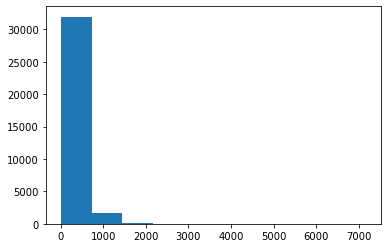

,listing_id,price
110179,447826,7163.0
834390,12972378,4000.0
676743,7633883,3314.0
676742,7633883,3051.0
785255,11866651,3000.0
1223482,6838488,2895.0
676741,7633883,2717.0
676729,7633883,2656.0
676740,7633883,2638.0
676761,7633883,2437.0


In [94]:
listing_price = calendar[(calendar['dataset']=='Boston')&(calendar['available']==1)][['listing_id','price']]
listing_price = listing_price[~listing_price.duplicated(keep='first')]

#make a histo of the distribution, is there a spread of higher prices?
plt.hist(listing_price['price'])
plt.show()

# show list of listing ids sorted by price
listing_price.sort_values(by = 'price', ascending=False).head(10)

There's just one listing with this price, and it's a lot higher than the next one up. 
Lets check this listing's details and pricing history

In [95]:
print(calendar[(calendar['listing_id']==447826) & (calendar['available']==1)]['price'].value_counts())
b_listings[b_listings['id']==447826]

71.0      294
7163.0      1
Name: price, dtype: int64


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,dataset
301,447826,https://www.airbnb.com/rooms/447826,20160906204935,2016-09-07,"Sweet Little House in JP, Boston","Our tiny guest room, often a favorite in a ho...",We have one tiny room available for guests in ...,"Our tiny guest room, often a favorite in a ho...",none,"Jamaica Plain, often considered the grooviest ...",...,f,NaN,NaN,f,moderate,t,t,1,3.86,Boston


There is a single calendar listing at $7163 and the remainder are at $71. The description also states this is a "tiny guest room".

Lets assume this is an error and correct this

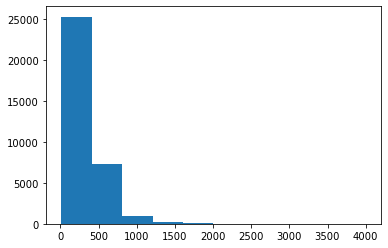

,listing_id,price
834390,12972378,4000.0
676743,7633883,3314.0
676742,7633883,3051.0
785255,11866651,3000.0
1223482,6838488,2895.0
676741,7633883,2717.0
676729,7633883,2656.0
676740,7633883,2638.0
676761,7633883,2437.0
676726,7633883,2415.0


In [96]:
#replace the value
calendar['price'] = calendar['price'].replace([7163.0],71.0)

#repeat the histo process
listing_price = calendar[(calendar['dataset']=='Boston')&(calendar['available']==1)][['listing_id','price']]
listing_price = listing_price[~listing_price.duplicated(keep='first')]
plt.hist(listing_price['price'])
plt.show()

#have a look at the top ten prices 
listing_price.sort_values(by = 'price', ascending=False).head(10)

Much better! Now lets check out this $4k listing. Although there are a handful of listings closer in price so this seems less ridiculous

In [97]:
print(calendar[(calendar['listing_id']==12972378) & (calendar['available']==1)]['price'].value_counts())
b_listings[b_listings['id']==12972378].head()

4000.0    336
Name: price, dtype: int64


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,dataset
2285,12972378,https://www.airbnb.com/rooms/12972378,20160906204935,2016-09-07,Fenway Park/Kenmore Square Flat,"Central Heat/AC, cable/internet, electricity, ...","Practicality, functionality, location, comfort","Central Heat/AC, cable/internet, electricity, ...",none,"Kenmore Square/Fenway Park, Boston, Massachusetts",...,f,NaN,NaN,f,strict,f,f,1,NaN,Boston


The price is consistent throughout the year, and its listed at Fenway park. This could explain the high price.

In [98]:
#have a look at the average cost now we've removed the outlier
calendar[(calendar['available']==1)][['dataset','price']].groupby('dataset').describe()

price                                                          
            count        mean         std   min   25%    50%    75%     max
dataset                                                                    
Boston   642957.0  198.425196  179.944528  11.0  85.0  150.0  255.0  4000.0
Seattle  934542.0  137.944859  105.062870  10.0  75.0  109.0  160.0  1650.0

Now we can start the comparison. We will expect some seasonaility in prices so lets compare the two cities on a monthly basis. 

In [99]:
#group up to city and month level
calendar_month = calendar.groupby(['dataset','month'])[['available','price']].sum().reset_index()
print(calendar_month.head())
print(calendar_month.info())

  dataset  month  available       price
0  Boston      1      63181  11549466.0
1  Boston      2      56810  10280396.0
2  Boston      3      55181  10032940.0
3  Boston      4      51382  10135248.0
4  Boston      5      53600  10382979.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dataset    24 non-null     object 
 1   month      24 non-null     int64  
 2   available  24 non-null     int32  
 3   price      24 non-null     float64
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 800.0+ bytes
None


Now use this to calculate the average daily price for each month in each city

In [100]:
calendar_month['daily_price'] = calendar_month['price']/calendar_month['available']
print(calendar_month.head())
print(calendar_month.info())

  dataset  month  available       price  daily_price
0  Boston      1      63181  11549466.0   182.799671
1  Boston      2      56810  10280396.0   180.961028
2  Boston      3      55181  10032940.0   181.818742
3  Boston      4      51382  10135248.0   197.252890
4  Boston      5      53600  10382979.0   193.712295
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dataset      24 non-null     object 
 1   month        24 non-null     int64  
 2   available    24 non-null     int32  
 3   price        24 non-null     float64
 4   daily_price  24 non-null     float64
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 992.0+ bytes
None


Plot this

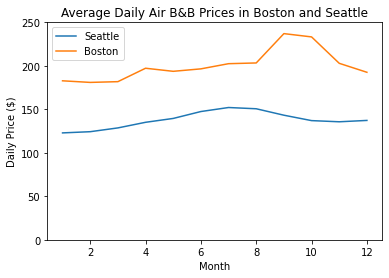

In [101]:
#ax.clear()
ax = plt.gca()

calendar_month[calendar_month['dataset']=='Seattle'].plot(x = 'month',  y = 'daily_price',label = 'Seattle', ax = ax)
calendar_month[calendar_month['dataset']=='Boston' ].plot(x = 'month',  y = 'daily_price',label = 'Boston' , ax = ax)

plt.ylim([0, 250])
plt.legend()
plt.xlabel('Month')
plt.ylabel('Daily Price ($)')
plt.title('Average Daily Air B&B Prices in Boston and Seattle')
plt.show()


Boston looks to have consistently higher prices than Seattle, particulalry in September and October.

Perhaps Boston has bigger rentals, accomadating more people and charging more?

In [102]:
listings[['dataset','accommodates']].groupby('dataset').describe()

accommodates                                              
               count      mean       std  min  25%  50%  75%   max
dataset                                                           
Boston        3585.0  3.041283  1.778929  1.0  2.0  2.0  4.0  16.0
Seattle       3818.0  3.349398  1.977599  1.0  2.0  3.0  4.0  16.0

This doesn't look to be the case. Boston has a lower mean of the number of people each property accommodates. 
There are probably many factors that effect the price, so lets have a look at the listings dataset and see if we can figure out what these are

## 2.2. Can we predict the price of a room based on the other listing data?

And also work out which are the important factors in predicting price. Firstly lets tidy up the listings dataset. There's a lot of fiels we won't need to use here. 

In [103]:
#lets have a look at the neighbourhood fields
pd.pivot_table(listings, 
               values=['neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed'], 
               index='dataset', 
               aggfunc='nunique')

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
dataset,,,
Boston,30,25,0
Seattle,81,87,17


group cleansed isn't populated for boston, but seems like the highest level for Seattle, which is what we want, while neighbourhood cleansed seems like the highest level for Boston. Lets combine these?

In [104]:
listings['nhood'] = np.where(listings['dataset']=='Boston',listings['neighbourhood_cleansed'],listings['neighbourhood_group_cleansed'])
pd.pivot_table(listings, 
               values='id', 
               index='nhood', 
               columns='dataset', 
               aggfunc='nunique')

dataset,Boston,Seattle
nhood,,
Allston,260.0,NaN
Back Bay,302.0,NaN
Ballard,NaN,230.0
Bay Village,24.0,NaN
Beacon Hill,194.0,118.0
Brighton,185.0,NaN
Capitol Hill,NaN,567.0
Cascade,NaN,89.0
Central Area,NaN,369.0


Downtown is showing for both cities, which is fine, seattle has a lot of listings in "other neighbourhoods", but lets leave this as is for now, as its likely not worth bringing ~80 neighbouhoods into the model.

Lets now select the revelent fields which we can use to build the model

In [105]:
#only select values we want to keep for the model
df  = listings[[#'qualatitive:
               'accommodates',
               'bathrooms',
               'bedrooms',
               'beds',
               'calculated_host_listings_count',
               'cancellation_policy',
               'guests_included',
               'host_acceptance_rate', 
               'host_has_profile_pic', 
               'host_identity_verified',
               'host_is_superhost',
               'host_response_rate', 
               'host_response_time', 
               'instant_bookable',
               'is_location_exact', 
               'maximum_nights',
               'minimum_nights',
               'number_of_reviews',
               'require_guest_phone_verification', 
               'require_guest_profile_picture',
                #categorical: 
                'bed_type',
                'dataset',
                'nhood',
                'property_type',
                'room_type',
                #value to predict:
               'price'
              ]]
df.describe(include = 'all')

,accommodates,bathrooms,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,host_acceptance_rate,host_has_profile_pic,host_identity_verified,...,minimum_nights,number_of_reviews,require_guest_phone_verification,require_guest_profile_picture,bed_type,dataset,nhood,property_type,room_type,price
count,7403.000000,7373.000000,7387.000000,7393.000000,7403.000000,7403.000000,7403.000000,6159.000000,7403.000000,7403.000000,...,7403.000000,7403.000000,7403.000000,7403.000000,7403,7403,7403,7399,7403,7403.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5,2,40,19,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Real Bed,Seattle,Other neighborhoods,Apartment,Entire home/apt,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7110,3818,794,4320,4668,NaN
mean,3.200189,1.241150,1.282659,1.674286,7.686073,2.137782,1.555045,91.981653,0.997704,0.756450,...,2.757666,20.684047,0.082669,0.052411,NaN,NaN,NaN,NaN,NaN,150.227881
std,1.890166,0.549408,0.823251,1.081355,21.465871,0.849962,1.200756,17.429163,0.047869,0.429253,...,13.243828,36.733024,0.275400,0.222870,NaN,NaN,NaN,NaN,NaN,124.019680
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,10.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,94.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,79.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,100.000000,1.000000,1.000000,...,2.000000,7.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,120.000000
75%,4.000000,1.000000,2.000000,2.000000,3.000000,3.000000,2.000000,100.000000,1.000000,1.000000,...,3.000000,23.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,190.000000


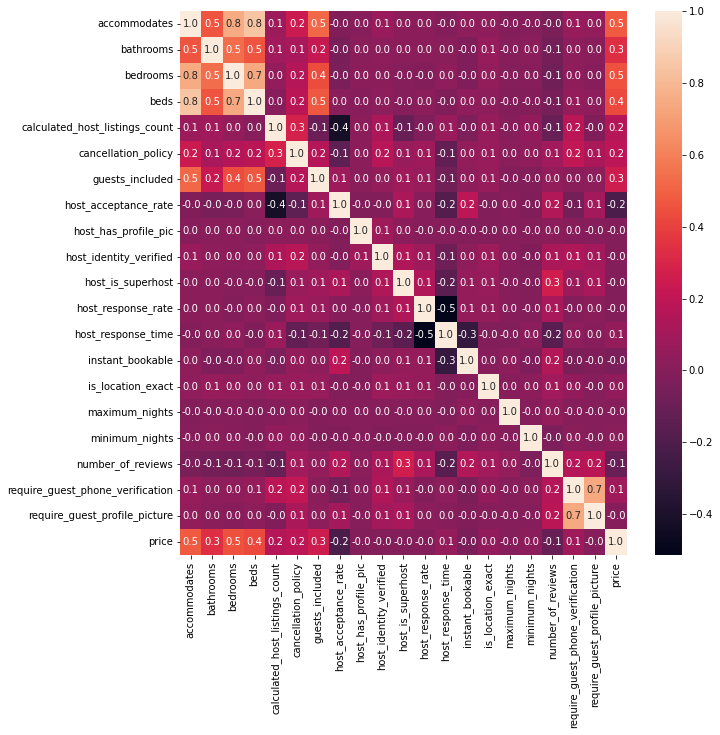

In [106]:
#lets try a heatmap to see any initial correlations
fig, ax = plt.subplots(figsize=(10,10))    
sn.heatmap(df.corr(), annot=True, fmt=".1f");

Does seem to be some variation with the price field. This will only look at numerical values though, and categorical ones may have an impact. Lets deal with them now

In [107]:
#deal with categorical variables
#extract categorical columns from the dataframe
cat_df = df.select_dtypes(include=['object']) 

print("number of categorical variables:", cat_df.shape[1])

def create_dummy_df(df,cat_cols):
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
        except:
            continue
    return df

df_new = create_dummy_df(df,cat_df.columns)

print(df_new.head())
print(df_new.shape)
#still have plenty fewer columns than rows so model will be fine to run

number of categorical variables: 5
   accommodates  bathrooms  bedrooms  beds  calculated_host_listings_count  \
0             4        1.0       1.0   1.0                               2   
1             4        1.0       1.0   1.0                               6   
2            11        4.5       5.0   7.0                               2   
3             3        1.0       0.0   2.0                               1   
4             6        2.0       3.0   3.0                               1   

   cancellation_policy  guests_included  host_acceptance_rate  \
0                    2                2                 100.0   
1                    3                1                 100.0   
2                    3               10                 100.0   
3                    1                1                   NaN   
4                    3                6                   NaN   

   host_has_profile_pic  host_identity_verified  ...  property_type_House  \
0                     1     

In [108]:
#lets drop rows which contain nulls and see what effect that has on the size
df_new = df_new.dropna()

df_new.describe()
#still have ~6100 left. This should be enough to still build the model on, without needing to impute any blanks, which could result in errors.

,accommodates,bathrooms,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,host_acceptance_rate,host_has_profile_pic,host_identity_verified,...,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Villa,property_type_Yurt,room_type_Private room,room_type_Shared room
count,6096.000000,6096.00000,6096.000000,6096.000000,6096.000000,6096.000000,6096.000000,6096.000000,6096.000000,6096.000000,...,6096.000000,6096.000000,6096.000000,6096.000000,6096.000000,6096.000000,6096.000000,6096.000000,6096.000000,6096.000000
mean,3.239009,1.24188,1.272966,1.688976,8.947671,2.221621,1.576115,92.031660,0.998688,0.788386,...,0.305774,0.010007,0.005413,0.000164,0.023294,0.000164,0.000328,0.000164,0.336450,0.028379
std,1.917527,0.55377,0.814732,1.102335,23.247558,0.828491,1.206809,17.379067,0.036205,0.408486,...,0.460772,0.099539,0.073382,0.012808,0.150848,0.012808,0.018112,0.012808,0.472534,0.166067
min,1.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.00000,1.000000,1.000000,1.000000,2.000000,1.000000,94.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,100.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,1.00000,2.000000,2.000000,4.000000,3.000000,2.000000,100.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,16.000000,8.00000,7.000000,16.000000,136.000000,4.000000,14.000000,100.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now lets write a function to try predicting the price for each city, using linear regression. 

In [109]:
def lin_reg(df,seattle_flag):
    
    #separate out the city's data:
    df_city = df.loc[df['dataset_Seattle']==seattle_flag] 
    
    #remove any columns with a single value in them, e.g. neighbourhoods not in the city we're looking at
    df_city = df_city.loc[:,df_city.apply(pd.Series.nunique) != 1]
    
    #separate out datasets to explanatory  and response 
    x = df_city.loc[:, df_city.columns != 'price']
    y = df_city['price']
    
    #split data
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =.3, random_state = 42)

    #instantiate model
    lm_model = LinearRegression()

    #fit training
    lm_model.fit(x_train, y_train)

    #predict test data
    y_test_preds_lm = lm_model.predict(x_test)

    #score model on the test data
    print("the r^2 score for lm is {} on {} values.".format(r2_score(y_test,y_test_preds_lm),len(y_test)))

    #lm coefficients
    coefs = pd.DataFrame(lm_model.coef_,
                         columns=['Coefficients'], 
                         index=x_train.columns)
    return(coefs)


Run the function

Boston:
the r^2 score for lm is 0.6155475269508064 on 927 values.


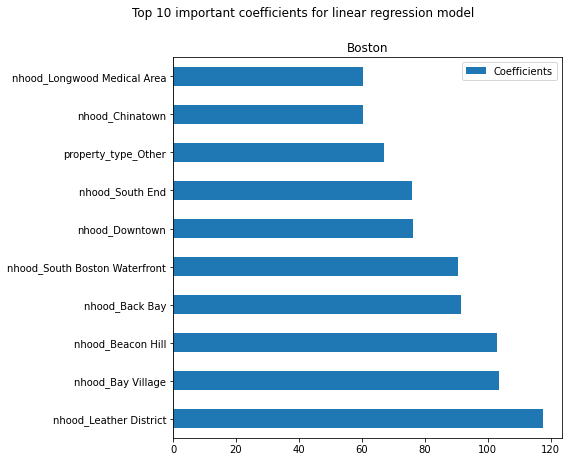

In [110]:
#Boston
print('Boston:')
boston_coefs = lin_reg(df_new,0)

#print(coefs.sort_values(by = 'Coefficients', ascending = False))                
boston_coefs.sort_values(by = 'Coefficients', ascending = False).head(10).plot(kind='barh', figsize=(9, 7))
plt.title('Boston')
plt.suptitle('Top 10 important coefficients for linear regression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)


Seattle:
the r^2 score for lm is 0.6045863315197995 on 903 values.


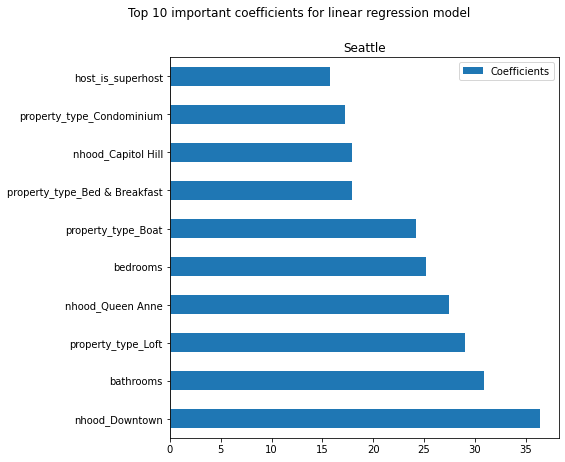

In [111]:
#Seattle
print('Seattle:')
seattle_coefs = lin_reg(df_new,1)

#print(seattle_coefs.sort_values(by = 'Coefficients', ascending = False))                
seattle_coefs.sort_values(by = 'Coefficients', ascending = False).head(10).plot(kind='barh', figsize=(9, 7))
plt.title('Seattle')
plt.suptitle('Top 10 important coefficients for linear regression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

For both cities neighbourhood seems to be amonst the most important predictor, particularly in Boston

## 2.3. Can we map neighbourhoods to figure out why?

Perhaps listings in central neighbourhoods are more expensive?

Start by working out the mean listing price in each neighbourhood, and also look at the mean location review score

In [112]:
#work out the means for price and location review scores
nhood_price_rank = listings.groupby(['dataset','nhood'])[['price','review_scores_location']].mean().reset_index()

#add in ranks for each of these
nhood_price_rank['price_rank']=nhood_price_rank.groupby(['dataset'])[['price']].rank(ascending=False)
nhood_price_rank['review_location_rank']=nhood_price_rank.groupby(['dataset'])[['review_scores_location']].rank(ascending=False)

#have a look
nhood_price_rank.sort_values('price_rank')

,dataset,nhood,price,review_scores_location,price_rank,review_location_rank
34,Seattle,Magnolia,177.672131,9.617021,1.0,7.0
21,Boston,South Boston Waterfront,306.060241,9.689655,1.0,8.0
2,Boston,Bay Village,266.833333,9.937500,2.0,4.0
37,Seattle,Queen Anne,157.223729,9.751020,2.0,5.0
31,Seattle,Downtown,154.405660,9.769737,3.0,2.0
13,Boston,Leather District,253.600000,9.333333,3.0,15.0
41,Seattle,West Seattle,141.359606,9.765432,4.0,4.0
1,Boston,Back Bay,240.950331,9.949153,4.0,2.0
8,Boston,Downtown,236.459302,9.694915,5.0,7.0
28,Seattle,Cascade,140.101124,9.569231,5.0,8.0


Now we have the average prices for each neighbourhood we can merge this back on to original data sets to get long and lat fields for mapping

In [113]:
boston_nhoods=pd.merge(left= b_listings, 
                       right =nhood_price_rank.loc[nhood_price_rank['dataset']=="Boston"],
                       left_on = 'neighbourhood_cleansed',
                       right_on = 'nhood',
                       how = 'left')


print(b_listings.shape)
print(boston_nhoods.shape)

(3585, 96)
(3585, 102)


In [114]:
#exclude other neighbourhoods as this isn't useful
seattle_nhoods=pd.merge(left= s_listings.loc[s_listings['neighbourhood_group_cleansed']!='Other neighborhoods'],
                       right =nhood_price_rank.loc[nhood_price_rank['dataset']=="Seattle"],
                       left_on = 'neighbourhood_group_cleansed',
                       right_on = 'nhood',
                       how = 'left')


print(s_listings.shape)
print(seattle_nhoods.shape)

(3818, 93)
(3024, 99)


Make plots of each city using longitude and latitude

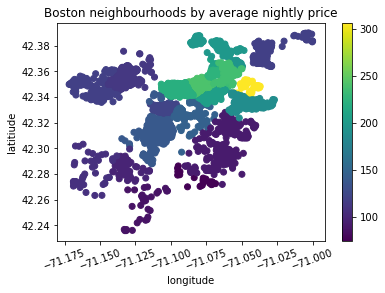

In [115]:
#Boston
plt.scatter('longitude', 'latitude', data = boston_nhoods, c = 'price_y')
plt.xticks(rotation=20)
plt.xlabel('longitude')
plt.ylabel('latitiude')
plt.title('Boston neighbourhoods by average nightly price')
plt.colorbar()
plt.show()

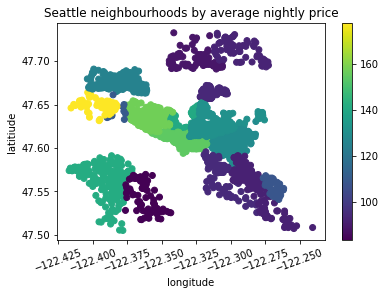

In [116]:
#Seattle
ax.clear()

plt.scatter('longitude', 'latitude', data = seattle_nhoods, c = 'price_y')
plt.xticks(rotation=20)
plt.xlabel('longitude')
plt.ylabel('latitiude')
plt.title('Seattle neighbourhoods by average nightly price')
plt.colorbar()
plt.show()

## 2.4. Does a higher price effect the ratings?
Are visitors happy with their location? 

Lets make a plot of their average location review scores for each neighbourhood

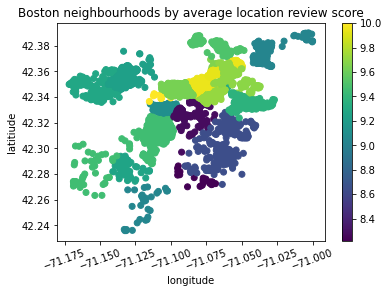

In [117]:
#Boston
plt.scatter('longitude', 'latitude', data = boston_nhoods, c = 'review_scores_location_y')
plt.xticks(rotation=20)
plt.xlabel('longitude')
plt.ylabel('latitiude')
plt.title('Boston neighbourhoods by average location review score')
plt.colorbar()
plt.show()

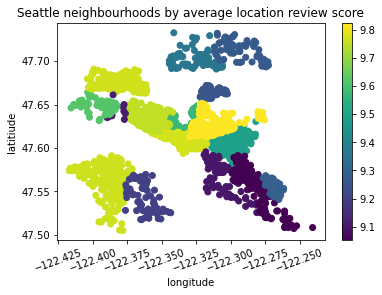

In [118]:
#Seattle
plt.scatter('longitude', 'latitude', data = seattle_nhoods, c = 'review_scores_location_y')
plt.xticks(rotation=20)
plt.xlabel('longitude')
plt.ylabel('latitiude')
plt.title('Seattle neighbourhoods by average location review score')
plt.colorbar()
plt.show()

Comparing these to the pricing maps they don't seem to directly correlate. Lets have a look at a comparison between the rankings

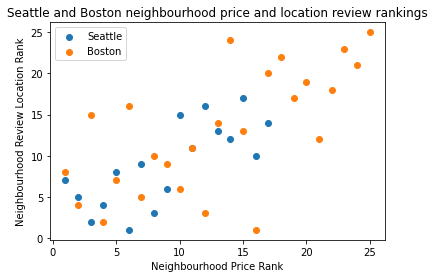

In [119]:
ax = plt.gca()

plt.scatter(x = 'price_rank',  y = 'review_location_rank',label = 'Seattle',data =nhood_price_rank[nhood_price_rank['dataset']=='Seattle'])
plt.scatter(x = 'price_rank',  y = 'review_location_rank',label = 'Boston' ,data =nhood_price_rank[nhood_price_rank['dataset']=='Boston'])
plt.legend()
plt.xlabel('Neighbourhood Price Rank')
plt.ylabel('Neighbourhood Review Location Rank')
plt.title('Seattle and Boston neighbourhood price and location review rankings')
plt.show()

A couple of stand outs here, Boston price rank  no 16 and review rank no 1  looks interesting

In [120]:
nhood_price_rank.sort_values('review_location_rank').head(2)

,dataset,nhood,price,review_scores_location,price_rank,review_location_rank
27,Seattle,Capitol Hill,130.592593,9.823529,6.0,1.0
14,Boston,Longwood Medical Area,138.444444,10.000000,16.0,1.0


This is Longwood medical area, lets have a look at this as its got a perfect review score!

In [121]:
listings[listings['nhood']=='Longwood Medical Area'].shape

(9, 97)

Only 9 listings so a very small area. 